# **Data Digital & Data Management**

## Actividad individual 1: "Consultas a Eurostat"

Fabio Santamaría Iglesias

08/03/2021

A partir del [generador de consultas de Eurostat](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder) construimos una consulta a la API de Eurostat para obtener datos del nivel de satisfacción (código del dataset: ilc_pw01) en Europa.

El colectivo objetivo del estudio es:

* Nivel de educación (isced11): Tertiary education ED5-8
* Indicador (indic_wb):   JOBSAT
* Género (sex): T – Total
* Edad (age): Y25-34 – From 25 to 34 years

## 1 Construir URL:

Lo primero es importar las librerías y crear una variable string con la URL de la llamada al API de Eurostat para obtener los datos del colectivo objetivo del estudio:

In [10]:
from urllib.request import urlretrieve
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np

#Crea una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio
urlEUROSTAT = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/" + "ilc_pw01?precision=1&sex=T&indic_wb=JOBSAT&isced11=ED5-8&age=Y25-34"

##2 Petición API y transformación a JSON: 

Hacemos la petición API con la URL de la consulta del punto anterior y transformamos el resultado a JSON. Por último, imprimimos el elemento "dimension" del diccionario creado.

In [11]:
result = json.load(urlopen(urlEUROSTAT))

print(result["dimension"])

{'unit': {'label': 'unit', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'isced11', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'indic_wb', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'age', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'geo', 'category': {'index': {'AT': 0, 'BE': 1, 'BG': 2, 'CH': 3, 'CY': 4, 'CZ': 5, 'DE': 6, 'DK': 7, 'EA': 8, 'EA18': 9, 'EA19': 10, 'EE': 11, 'EL': 12, 'ES': 13, 'EU': 14, 'EU27_2007': 15, 'EU27_2020': 16, 'EU28': 17, 'FI': 18, 'FR': 19, 'HR': 20, 'HU': 21, 'IE': 22, 'IS': 23, 'IT': 24, 'LT': 25, 'LU': 26, 'LV': 27, 'ME': 28, 'MK': 29, 'MT': 30, 'NL': 31, 'NO': 32, 'PL': 33, 'PT': 34, 'RO': 35, 'RS': 36, 'SE': 37, 'SI': 38, 'SK': 39, 'TR': 40, 'UK': 

Este resultado nos servirá después para traducir algunos valores del conjunto de datos obtenido mediante la librería *eurostat*.

##3 Descarga de los datos en formato pandas:

Descargamos los datos de Satisfacción en Europa (código del dataset: ilc_pw01) en formato *pandas* a partir de la función get_data_df() de la librería eurostat. Para ello, primero debemos instalar el paquete *eurostat*:

In [12]:
!pip install eurostat

In [13]:
import eurostat

df = eurostat.get_data_df("ilc_pw01", flags=False)

df.head()

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
0,RTG,ED0-2,ACCSAT,F,Y16-24,AT,NaN,8.6
1,RTG,ED0-2,ACCSAT,F,Y16-24,BE,NaN,7.8
2,RTG,ED0-2,ACCSAT,F,Y16-24,BG,NaN,5.3
3,RTG,ED0-2,ACCSAT,F,Y16-24,CH,NaN,NaN
4,RTG,ED0-2,ACCSAT,F,Y16-24,CY,NaN,8.2


##4 Filtrado del conjunto de datos solicitados:

La actividad nos pide que nos centremos en los datos 

* Nivel de educación (isced11): Tertiary education ED5-8
* Indicador (indic_wb):   JOBSAT
* Género (sex): T – Total
* Edad (age): Y25-34 – From 25 to 34 years

Presentamos las 6 primeras filas:

In [23]:
df_filtered = df[(df.isced11=="ED5-8") & (df.indic_wb=="JOBSAT") & (df.sex=="T") & (df.age=="Y25-34")]

df_filtered.head(6)

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23325,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23326,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23327,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23328,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN
23329,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4
23330,RTG,ED5-8,JOBSAT,T,Y25-34,CZ,7.9,7.9


Nos interesa el nivel de satisfacción en 2018 para cada país. Para ello, nos aseguramos de que no haya ningún dato faltante en la columna *geo\time* o en la columna *2018*

In [28]:
df_filtered.filter(["geo\\time", 2018]).isnull().values.any()

False

Como vemos, no hay ningún nulo en el subconjunto de datos a analizar. Podemos asegurarnos también de que no haya países duplicados.

In [30]:
df_filtered.filter(["geo\\time"]).duplicated().values.any()

False

Tampoco hay valores duplicados, por lo que podemos continuar con el análisis sin problemas.

##5 Gráfico del nivel de satisfacción en cada país.

Construimos un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018. Para ello, primero  filtramos para quedarnos con la columna que nos interesa, en este caso, los valores de la columna 2018. Colocamos el nombre de los países como índice. Ordenamos los valores y creamos el gráfico.

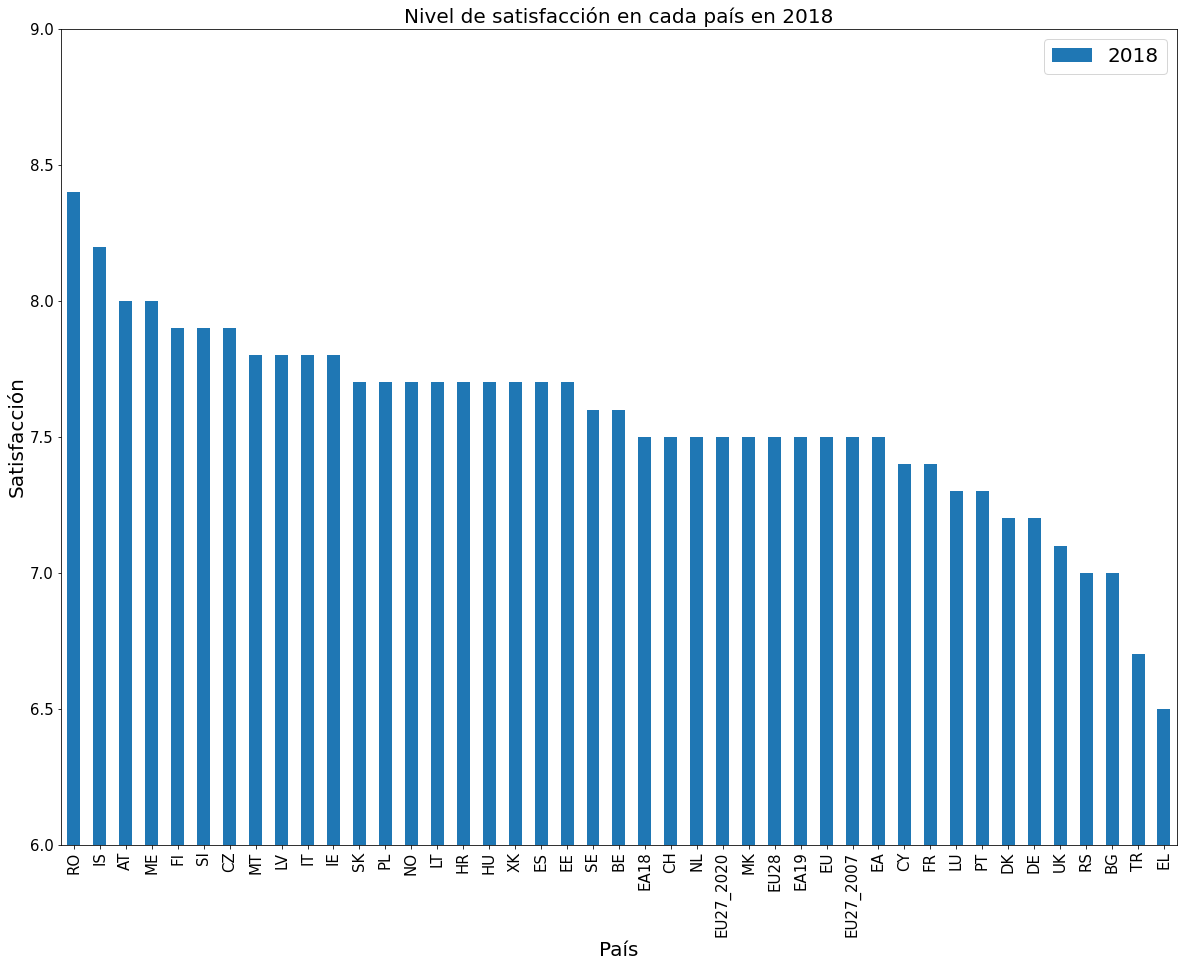

In [15]:
df_plot_jobsat_per_country = df_filtered.filter([2018]);

df_plot_jobsat_per_country.index = df_filtered["geo\\time"];

df_plot_jobsat_per_country.sort_values(by = 2018, inplace=True, ascending=False)

plot = df_plot_jobsat_per_country.plot(figsize=(20,15), ylim = (6,9), fontsize = 15, kind = "bar");

plot.set_title("Nivel de satisfacción en cada país en 2018", fontsize = 20);
plot.set_xlabel("País", fontsize = 20);
plot.set_ylabel("Satisfacción", fontsize = 20);
plot.legend(fontsize = 20);

Si no sabemos el código asociado a cada país, podemos traducirlo usando el resultado de la consulta del punto 1 de esta actividad. Copiamos el dataframe anterior y creamos una nueva columna en la que remplazamos los códigos por los nombres de los países. Ordenamos y pintamos de nuevo el gráfico.

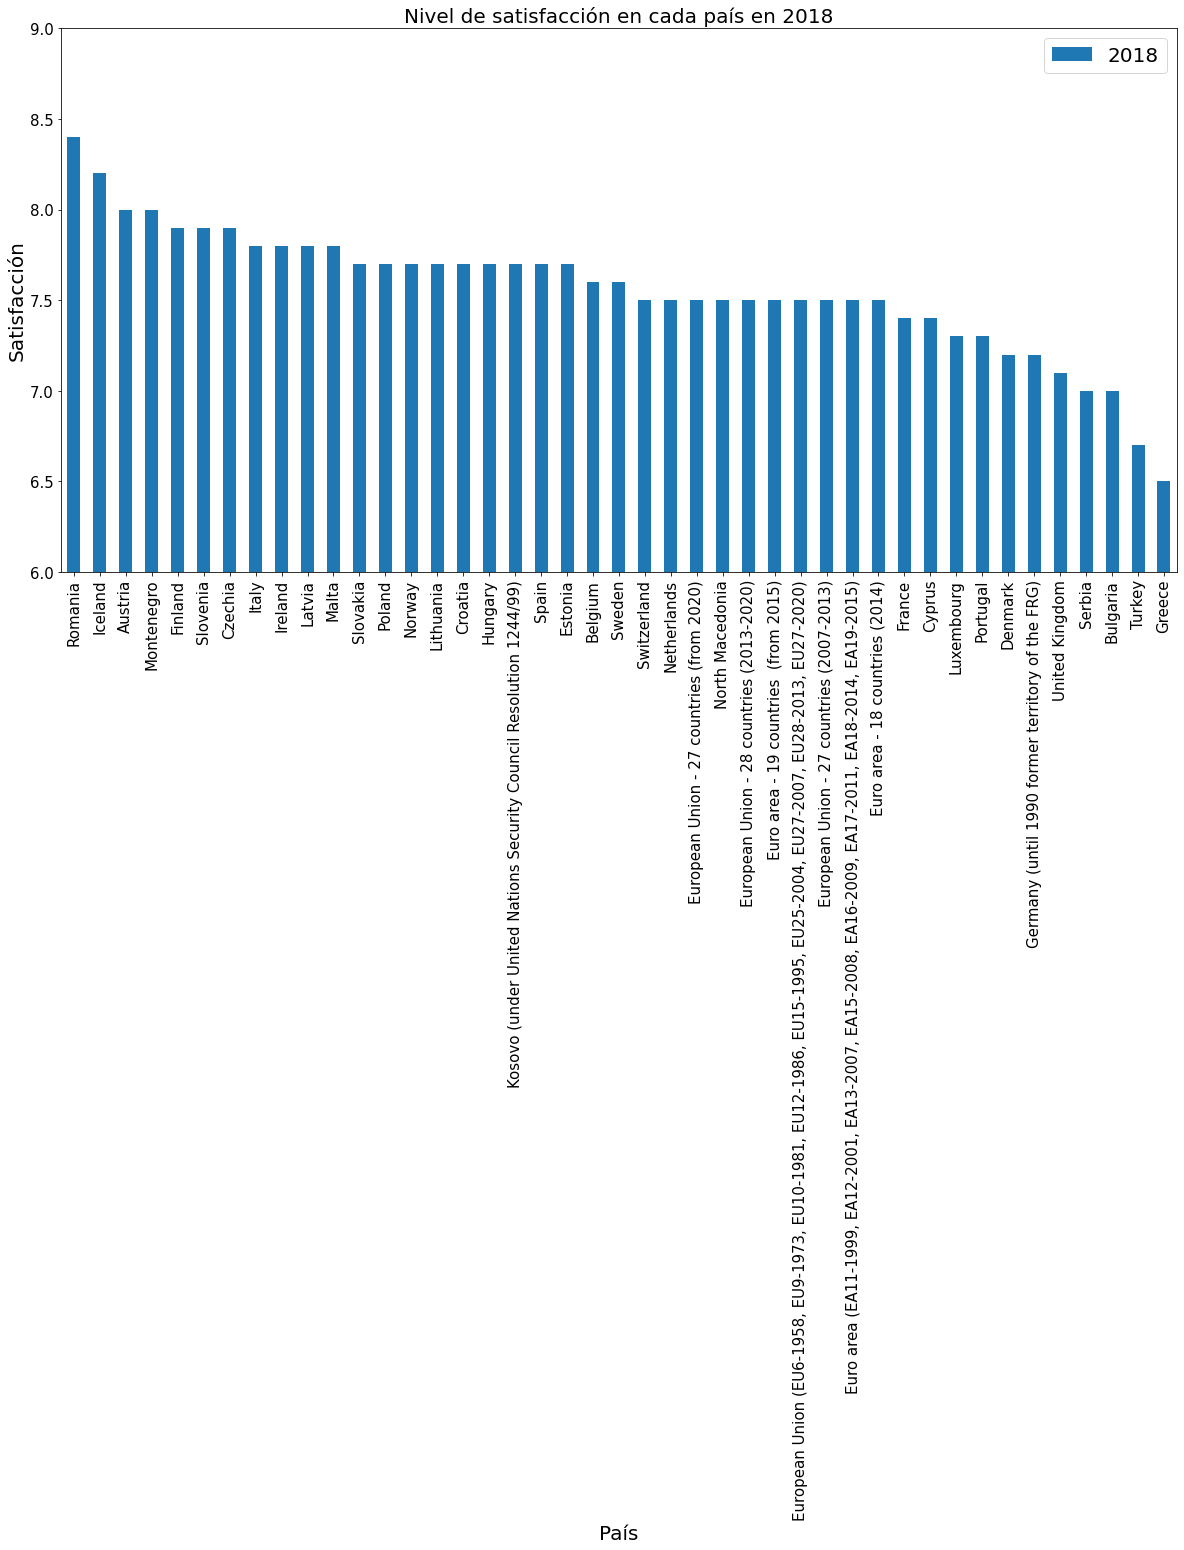

In [21]:
df_plot_jobsat_per_country_name = df_plot_jobsat_per_country.copy(deep=True)

df_plot_jobsat_per_country_name["Country Name"] = df_plot_jobsat_per_country_name.index

df_plot_jobsat_per_country_name["Country Name"].replace(result["dimension"]["geo"]["category"]["label"], inplace=True)

df_plot_jobsat_per_country_name.sort_values(by = 2018, inplace=True, ascending=False)

plot = df_plot_jobsat_per_country_name.plot(figsize=(20,10), ylim = (6,9), fontsize = 15, kind = "bar");

plot.set_title("Nivel de satisfacción en cada país en 2018", fontsize = 20);
plot.set_xlabel("País", fontsize = 20);
plot.set_ylabel("Satisfacción", fontsize = 20);
plot.set_xticklabels(df_plot_jobsat_per_country_name["Country Name"])
plot.legend(fontsize = 20);



Además de países, el conjunto de datos incluye agrupaciones políticas, como la **Unión Europea**.

## 6 Conclusiones

Vemos que **Rumania** es el país en donde la satisfacción laboral es mayor, con un valor cercano al **8.5**. Por el contrario, **Grecia** se sitúa a la cola con un **6.5**. Además, es llamativo como la Unión Europea en sus diferentes versiones obtiene la misma puntuación de **7.5**. Esto nos indica que tener en cuenta los países de reciente anexión a la unión o la marcha de Reino Unido no alteran la media de satisfacción laboral en obtenida en 2018.